# Business Goal 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


## Step 1: Reading and Understanding the Data

In [1360]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
car=pd.read_csv('CarPrice_Assignment.csv')
import sklearn
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1361]:
pd.set_option('display.max_columns',150)

In [1362]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1363]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising and Data cleaning/Preparation

### Plotting Pairplot and try to visualise patterns in the data

sns.set(font_scale=2)
plt.figure(figsize=(23,20))
sns.pairplot(data=car)
plt.show()

### Correlations in the data

plt.figure(figsize=(20,15))
sns.heatmap(car.corr(),annot=True)

#### Omitting Correlated variables

In [1364]:
# as we can see from the heatmap: carlength,wheelbase,carwidth,curbweight are strongly correlated.
# we will be choosing only one for regression

In [1365]:
car.drop(['carwidth','highwaympg','curbweight','wheelbase'],axis=1,inplace=True)

car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [1366]:
#Derived metrics of car brand name and fixing misspelling 
car['brand']=car['CarName'].str.split(' ',n=1,expand=True)[0]
car['brand']=car['brand'].str.lower()
car['brand']=car['brand'].str.replace('toyouta','toyota')
car['brand']=car['brand'].str.replace('vokswagen','volkswagen')
car['brand']=car['brand'].str.replace('vw','volkswagen')
car['brand']=car['brand'].str.replace('porcshce','porsche')
car['brand']=car['brand'].str.replace('maxda','mazda')


In [1367]:
car.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1368]:
#dropping CarName and its ID as its not required for analysis
car.drop(['CarName','car_ID'],axis=1,inplace=True)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,brand
0,3,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi


### Finding outliers in the prices of the car

In [1369]:
car.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

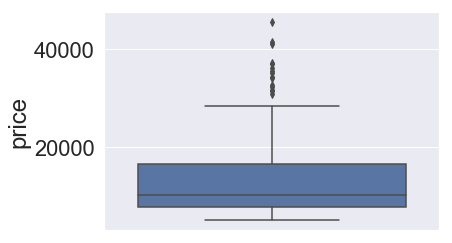

In [1370]:
sns.boxplot(car.price,orient='v')


In [1371]:
'''car_brand=car[['brand','price']].groupby('brand').mean()
car=car.loc[~(car.brand==('jaguar'))]
car=car.loc[~(car.brand==('buick'))]
car.brand.unique()
print(car.price.describe())
sns.boxplot(car.price)'''
#code written to find out outliers

"car_brand=car[['brand','price']].groupby('brand').mean()\ncar=car.loc[~(car.brand==('jaguar'))]\ncar=car.loc[~(car.brand==('buick'))]\ncar.brand.unique()\nprint(car.price.describe())\nsns.boxplot(car.price)"

#### Found out model is performing good without omitting outliers, so decided to keep it

### Creating Dummy variables for Categorical Varibales

In [1372]:
le=preprocessing.LabelEncoder()
car['fueltype']=le.fit_transform(car.fueltype)
car['aspiration']=le.fit_transform(car.aspiration)
car['doornumber']=le.fit_transform(car.doornumber)
car['enginelocation']=le.fit_transform(car.enginelocation)
#Naming convention:
#gas-1,diesel=0
#doornumer-2nos-1, 4-0
#front enginelocation-0, rear-1
#aspiration std-0

In [1373]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,brand
0,3,1,0,1,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,3,1,0,1,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero
2,1,1,0,1,hatchback,rwd,0,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero
3,2,1,0,0,sedan,fwd,0,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,2,1,0,0,sedan,4wd,0,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi


In [1374]:
car=pd.get_dummies(car)
car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_alfa-romero,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,3,1,0,1,0,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,13495.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,0,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,16500.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,16500.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,13950.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,17450.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 3: Data split of training and test set

In [1375]:
df=car.copy()


In [1376]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)


### Step 4: Fix Scaling using Standardizing / minmaxscaling 

In [1377]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
fix_var=['symboling','price','carheight','carlength', 'enginesize', 'boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg']
df_train[fix_var]=scaler.fit_transform(df_train[fix_var])
df_test[fix_var]=scaler.transform(df_test[fix_var])
y_train=df_train.pop('price')
X_train=df_train

In [1378]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_alfa-romero,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
122,0.6,1,0,0,0,0.426016,0.265487,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1.0,1,0,1,0,0.452033,0.212389,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.6,1,0,1,0,0.448780,0.424779,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,1,0,1,0,0.450407,0.088496,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,1,1,0,0,0.775610,0.858407,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Step 5: Building Model using RFE

In [1379]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1380]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1381]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('fueltype', False, 47),
 ('aspiration', False, 5),
 ('doornumber', False, 24),
 ('enginelocation', False, 43),
 ('carlength', True, 1),
 ('carheight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 51),
 ('horsepower', False, 32),
 ('peakrpm', False, 4),
 ('citympg', False, 50),
 ('carbody_convertible', False, 9),
 ('carbody_hardtop', False, 36),
 ('carbody_hatchback', False, 35),
 ('carbody_sedan', False, 34),
 ('carbody_wagon', False, 37),
 ('drivewheel_4wd', False, 42),
 ('drivewheel_fwd', False, 41),
 ('drivewheel_rwd', False, 25),
 ('enginetype_dohc', False, 8),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 13),
 ('enginetype_ohcf', False, 21),
 ('enginetype_ohcv', False, 7),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 12),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 2

In [1382]:
col = X_train.columns[~rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'brand_alfa-romero', 'brand_chevrolet', 'brand_dodge', 'brand_honda',
       'brand_isuzu', 'brand_jaguar', 'brand_mazda', 'brand_mercury',
       'brand_mitsubishi', 'brand_nissan', 'brand_peugeot', 'brand_plymouth',
       'brand_renault', 'brand_saab', 'brand_subaru', 'brand_toyota',
       'brand_volkswagen', 'brand_volvo'],
      dtype='object')

In [1383]:
X_trainrfe=X_train.drop(col,axis=1)
X_trainrfe.head()

,carlength,enginesize,boreratio,stroke,enginetype_dohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,brand_audi,brand_bmw,brand_buick,brand_porsche
122,0.426016,0.139623,0.230159,0.525253,0,0,0,1,0,0,0,0,0,0,0
125,0.452033,0.339623,1.000000,0.464646,0,0,0,1,0,0,0,0,0,0,1
166,0.448780,0.139623,0.444444,0.449495,0,0,0,1,0,0,0,0,0,0,0
1,0.450407,0.260377,0.626984,0.247475,0,0,0,1,0,0,0,0,0,0,0
199,0.775610,0.260377,0.746032,0.484848,0,0,0,1,0,0,0,0,0,0,0


### RFE Model 1

In [1384]:
import statsmodels.api as sm
X_trainrfe=sm.add_constant(X_trainrfe)
lm_1=sm.OLS(y_train,X_trainrfe).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.94e-61
Time:                        19:54:53   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

### Defining VIF function

In [1385]:
def vif_df(df):
    vif=pd.DataFrame(columns=['Var','Vif'])
    vif['Var']=df.columns
    vif['Vif'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['Vif']=round(vif['Vif'],2)
    vif = vif.sort_values(by = "Vif", ascending = False)
    return vif


### Model 1: VIF & HeatMap

In [1386]:
vif_df(X_trainrfe)

,Var,Vif
6,enginetype_rotor,inf
11,cylindernumber_two,inf
0,const,57.560000
2,enginesize,30.460000
8,cylindernumber_four,14.630000
3,boreratio,7.970000
7,cylindernumber_eight,4.810000
10,cylindernumber_twelve,4.070000
1,carlength,3.390000
5,enginetype_dohcv,3.350000


#### As p-value of enginelocation is high and its insignificant

### Model 2: Model 1 dropping enginetype_rotor

In [1387]:
X_trainrfe2=X_trainrfe.drop(['enginetype_rotor'],axis=1)
lm_sm2=sm.OLS(y_train,X_trainrfe2).fit()
print(lm_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.94e-61
Time:                        19:54:53   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [1388]:
vif_df(X_trainrfe2)

,Var,Vif
0,const,57.56
2,enginesize,30.46
7,cylindernumber_four,14.63
3,boreratio,7.97
10,cylindernumber_two,6.32
6,cylindernumber_eight,4.81
9,cylindernumber_twelve,4.07
1,carlength,3.39
5,enginetype_dohcv,3.35
4,stroke,3.32


#### As VIF value of enginetype_rotor is high , we will drop that.

### Model 3: Dropping cylindernumber_eight in model2

In [1389]:
X_trainrfe3=X_trainrfe2.drop(['enginetype_dohcv'],axis=1)
lm_sm3=sm.OLS(y_train,X_trainrfe3).fit()
print(lm_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.78e-61
Time:                        19:54:53   Log-Likelihood:                 189.78
No. Observations:                 143   AIC:                            -351.6
Df Residuals:                     129   BIC:                            -310.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [1390]:
vif_df(X_trainrfe3)

,Var,Vif
0,const,54.22
2,enginesize,21.60
6,cylindernumber_four,10.73
3,boreratio,6.13
9,cylindernumber_two,4.77
1,carlength,3.38
8,cylindernumber_twelve,3.21
4,stroke,2.53
5,cylindernumber_eight,2.17
10,brand_audi,1.81


### Model 4: Dropping enginetype_dohcv in model 3

In [1391]:
X_trainrfe4=X_trainrfe3.drop(['cylindernumber_eight'],axis=1)
lm_sm4=sm.OLS(y_train,X_trainrfe4).fit()
print(lm_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.37e-61
Time:                        19:54:53   Log-Likelihood:                 187.92
No. Observations:                 143   AIC:                            -349.8
Df Residuals:                     130   BIC:                            -311.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [1392]:
vif_df(X_trainrfe4)

,Var,Vif
0,const,53.24
2,enginesize,16.02
5,cylindernumber_four,8.92
3,boreratio,5.10
8,cylindernumber_two,3.94
1,carlength,3.37
7,cylindernumber_twelve,2.61
4,stroke,2.03
9,brand_audi,1.71
6,cylindernumber_three,1.56


### Model 5: Dropping cylindernumber_four in model 4

In [1393]:
X_trainrfe5=X_trainrfe4.drop(['cylindernumber_twelve'],axis=1)
lm_sm5=sm.OLS(y_train,X_trainrfe5).fit()
print(lm_sm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.37e-61
Time:                        19:54:53   Log-Likelihood:                 184.37
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     131   BIC:                            -309.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1258 

In [1394]:
vif_df(X_trainrfe5)

,Var,Vif
0,const,50.14
2,enginesize,6.73
5,cylindernumber_four,6.02
3,boreratio,3.67
1,carlength,3.35
7,cylindernumber_two,2.62
8,brand_audi,1.55
11,brand_porsche,1.45
6,cylindernumber_three,1.38
4,stroke,1.37


### Model 6: Dropping cylindernumber_twelve in model 5

In [1395]:
X_trainrfe6=X_trainrfe5.drop(['cylindernumber_four'],axis=1)
lm_sm6=sm.OLS(y_train,X_trainrfe6).fit()
print(lm_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.52e-62
Time:                        19:54:53   Log-Likelihood:                 183.72
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     132   BIC:                            -312.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0935 

In [1396]:
X_trainrfe6=X_trainrfe6.drop(['stroke'],axis=1)
lm_sm6=sm.OLS(y_train,X_trainrfe6).fit()
print(lm_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.71e-62
Time:                        19:54:53   Log-Likelihood:                 182.76
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     133   BIC:                            -315.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1232 

In [1397]:
X_trainrfe6=X_trainrfe6.drop(['boreratio'],axis=1)
lm_sm6=sm.OLS(y_train,X_trainrfe6).fit()
print(lm_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.47e-63
Time:                        19:54:53   Log-Likelihood:                 181.74
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     134   BIC:                            -318.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1310 

In [1398]:
X_trainrfe6=X_trainrfe6.drop(['cylindernumber_three'],axis=1)
lm_sm6=sm.OLS(y_train,X_trainrfe6).fit()
print(lm_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.32e-63
Time:                        19:54:53   Log-Likelihood:                 179.98
No. Observations:                 143   AIC:                            -344.0
Df Residuals:                     135   BIC:                            -320.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1233      0

In [1399]:
X_trainrfe6=X_trainrfe6.drop(['carlength'],axis=1)
lm_sm6=sm.OLS(y_train,X_trainrfe6).fit()
print(lm_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.35e-60
Time:                        19:54:53   Log-Likelihood:                 169.83
No. Observations:                 143   AIC:                            -325.7
Df Residuals:                     136   BIC:                            -304.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0674      0

In [1400]:
vif_df(X_trainrfe6)
X_trainrfe6.columns

Index(['const', 'enginesize', 'cylindernumber_two', 'brand_audi', 'brand_bmw',
       'brand_buick', 'brand_porsche'],
      dtype='object')

### Step 6: Residual analysis and Test model Evaluation

#### Finding out X_test and y_test

In [1401]:
df_test=df_test[['enginesize', 'cylindernumber_two', 'brand_audi', 'brand_bmw',
       'brand_buick', 'brand_porsche','price']]
y_test=df_test.pop('price')
X_test=df_test

In [1402]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lm_sm6.predict(X_test_sm)
y_train_pred=lm_sm6.predict(X_trainrfe6)

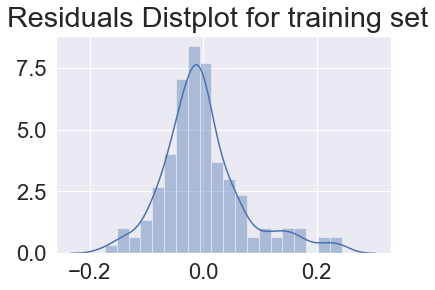

In [1403]:
#Residual Analysis for training set
plt.suptitle('Residuals Distplot for training set')
sns.distplot(y_train-y_train_pred,bins=20)

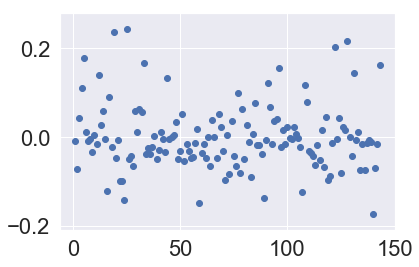

In [1404]:
c1=[i for i in range(1,144,1)]
plt.scatter(c1,y_train-y_train_pred)

#### Error residuals are random in nature

### Evaluation of model using line graphs

Text(0,0.5,'price')

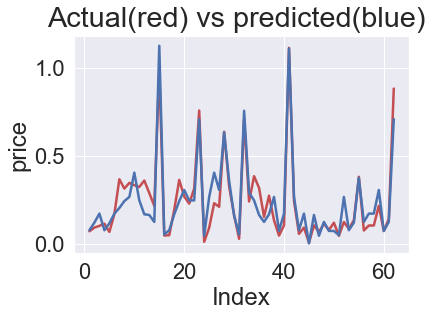

In [1405]:
c=[i for i in range(1,63,1)]
fig=plt.figure()
plt.plot(c,y_test,'r',linewidth='2.5')
plt.plot(c,y_test_pred,'b',linewidth='2.5')
plt.suptitle('Actual(red) vs predicted(blue)')
plt.xlabel('Index')
plt.ylabel('price')

### Checking for error terms

Text(0.5,0.98,'Error vs index')

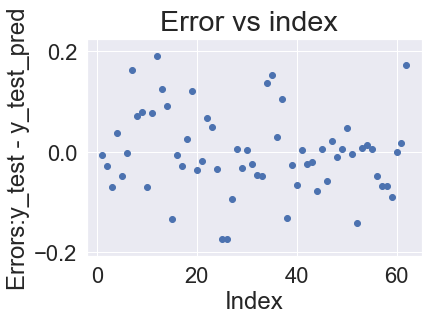

In [1406]:
plt.figure()
plt.scatter(c,y_test-y_test_pred)
plt.xlabel('Index')
plt.ylabel('Errors:y_test - y_test_pred')
plt.suptitle('Error vs index')

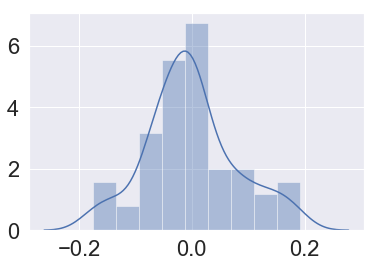

In [1407]:
sns.distplot(y_test-y_test_pred)

In [1408]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
r_sq=r2_score(y_test,y_test_pred)
#mse=mean_squared_error(y_test,y_test_pred)
print('r2_score is :',r_sq)
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

r2_score is : 0.879370510397811
RMSE : 0.08029591082137143


### Final Model Summary

In [1409]:
print(lm_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.35e-60
Time:                        19:54:54   Log-Likelihood:                 169.83
No. Observations:                 143   AIC:                            -325.7
Df Residuals:                     136   BIC:                            -304.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0674      0

## Conclusions:
1. From seeing Error terms,we can see its normally distributed and are random in nature ,not making any patterns
2. R2 score and RMSE are coming out good for this model, R2 score being 0.8971 and RMSE being 0.0792
3. Variables left out after finding the best fit for linear regression are:
        -enginesize
        -aspiration
        -cylindernumber_two
        -brand_audi
        -brand_bmw
        -brand_buick
        -brand_porsche
        -brand_mitsubishi
        -brand_saab
        -brand_volvo